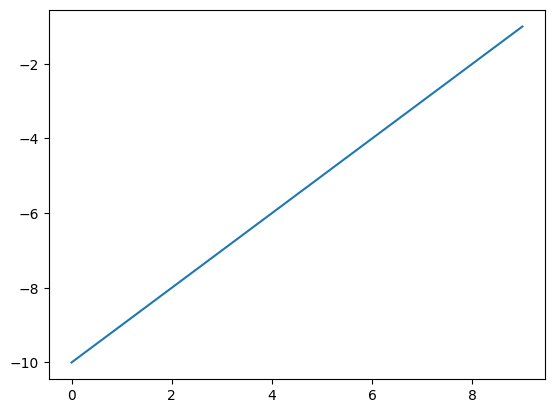

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

x = list(range(0,10))
y = list(range(-10,0))

plt.plot(x,y)

In [7]:
import pandas as pd
import numpy as  np

df = pd.read_csv('atussum_0321.csv', header='infer')

#reading only few columns to verify if query is working fine
filtered_df = pd.read_csv('atussum_0321.csv', header='infer', usecols=["TESEX", "GTMETSTA", "TRCHILDNUM","PEHSPNON","TEAGE"])
#index as per the variable filters? for faster retrival like sex, metro / non-metro, education status
#df = pd.read_csv('atussum_0321.csv', header='infer', index_col='TUCASEID')


In [24]:
#variable filters
newdf = df.query('TESEX == 1 & GTMETSTA == 1 & TRCHILDNUM < 4')
newdf.head(10)

#filter to verify .query function
new_filtered_df = filtered_df.query('TESEX == 1 & GTMETSTA == 1 & TRCHILDNUM < 4')
new_filtered_df.head(10)

,GTMETSTA,TEAGE,TESEX,TRCHILDNUM
28806,1,62,1,0
28807,1,20,1,0
28809,1,31,1,0
28811,1,45,1,0
28812,1,57,1,0
28813,1,48,1,3
28814,1,59,1,0
28815,1,45,1,0
28816,1,45,1,1
28817,1,37,1,2


<AxesSubplot: ylabel='Frequency'>

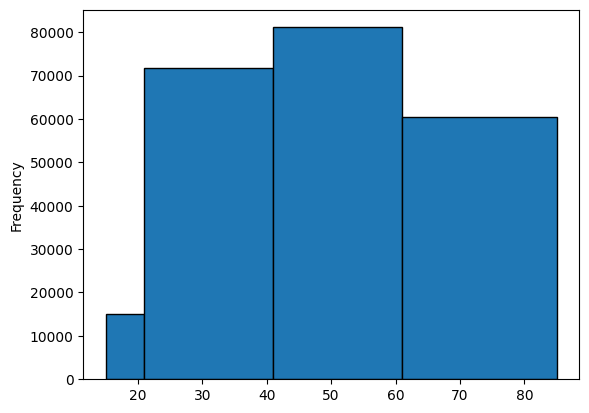

In [29]:
#no filter
#df['TEAGE'].plot(kind='hist')
#df['TEAGE'].plot(kind='hist', bins=20) => total number of bins
    #custom bins
df['TEAGE'].plot(kind='hist', edgecolor="black", bins=[15, 21, 41, 61, 85])
#new_filtered_df['TEAGE'].plot(kind='hist', edgecolor="black", bins=[15, 21, 41, 61, 85])

<AxesSubplot: ylabel='Frequency'>

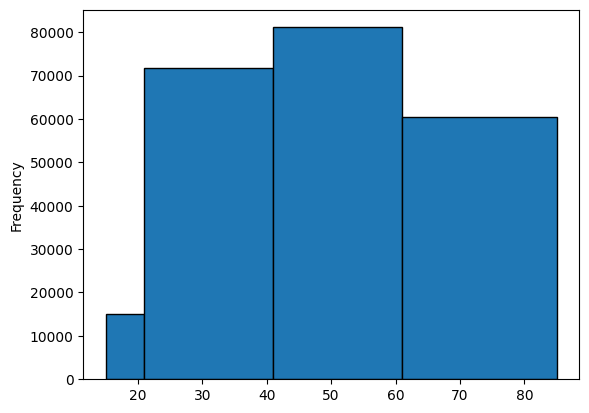

In [21]:
    df['TEAGE'].plot(kind='hist', edgecolor="black", bins=[15, 21, 41, 61, 85])

<AxesSubplot: ylabel='Frequency'>

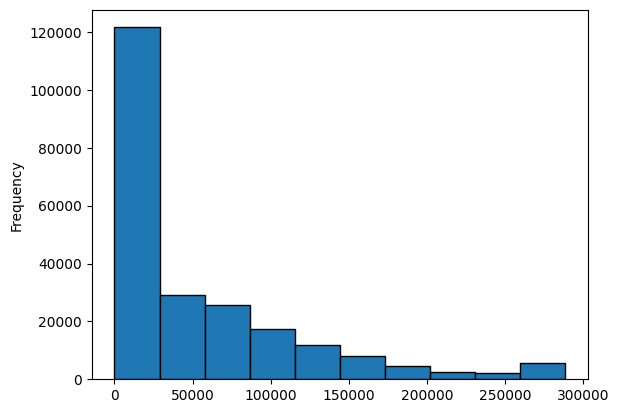

In [32]:
df['TRERNWA'].plot(kind='hist', edgecolor="black")

In [49]:
import pandas as pd

group1 =  df.groupby(['TESEX'])
print("******************1 variable*************************")
print(group1.TEAGE.count())

group2 =  df.groupby(['TESEX', 'GTMETSTA'])
print("******************2 variables*************************")
print(group2.TUCASEID.count())

group3 =  df.groupby(['TESEX', 'GTMETSTA', 'TRCHILDNUM'])
print("******************3 variables*************************")
print(group3.TUCASEID.count())


group4 =  df.groupby(['TESEX','GTMETSTA','TRCHILDNUM','PEHSPNON'])
print("******************four variables*************************")
print(group4.TUCASEID.count())

******************1 variable*************************
TESEX
1    100791
2    127664
Name: TEAGE, dtype: int64
******************2 variables*************************
TESEX  GTMETSTA
1      -1          12663
        1          73102
        2          14304
        3            722
2      -1          16350
        1          91895
        2          18524
        3            895
Name: TUCASEID, dtype: int64
******************3 variables*************************
TESEX  GTMETSTA  TRCHILDNUM
1      -1        0             6966
                 1             2301
                 2             2202
                 3              875
                 4              245
                               ... 
2       3        5                8
                 6                2
                 7                2
                 9                1
                 11               1
Name: TUCASEID, Length: 82, dtype: int64
******************four variables*************************
TESEX  GTMET

In [51]:
print("5")


5


In [27]:
import pandas as pd
    #Group by two keys and then summarize each group
income_bins = [15,21,41,61,85]
group1 =  df.groupby(['TESEX']).TRERNWA.count()

group2 =  df.groupby(['TESEX','GTMETSTA','TRCHILDNUM','PEHSPNON']).TRERNWA.count()
print(group1)
print(group2)



TESEX
1    100791
2    127664
Name: TRERNWA, dtype: int64
TESEX  GTMETSTA  TRCHILDNUM  PEHSPNON
1      -1        0           1            599
                             2           6367
                 1           1            269
                             2           2032
                 2           1            305
                                         ... 
2       3        6           1              1
                             2              1
                 7           2              2
                 9           2              1
                 11          1              1
Name: TRERNWA, Length: 146, dtype: int64


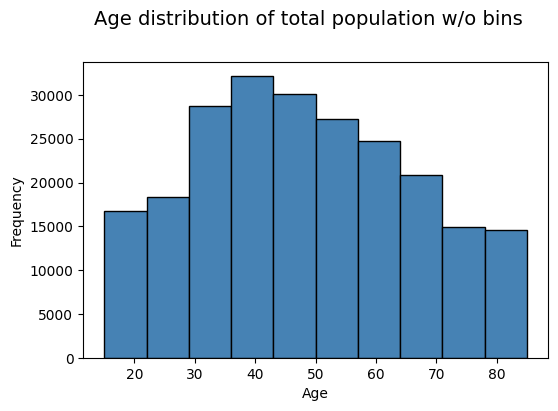

In [26]:
import matplotlib.pyplot as plt
#medium blog
#categorize as per age - derived

def ageCondition(x):
    if x >  15 and x < 20: return "Teenage"
    elif x >= 20 and x < 40: return "Young"
    elif x >= 40 and x < 60: return "Adult"
    elif x >= 60 and x < 85: return "Senior Citizen"
df['AgeGroup'] = df['TEAGE'].apply(ageCondition)

df['AgeGroup'] = pd.Categorical(df['AgeGroup'], 
                                           categories=['Teenage', 'Young', 'Adult', 'Senior Citizen'])


#print(df.head(5))
#subset_attributes = ['TESEX','GTMETSTA','TRCHILDNUM','PEHSPNON']

#doesn't make sense as most of the variables are categorical
#rs = round(df[subset_attributes].describe(),2)
#print(rs)

fig = plt.figure(figsize = (6,4))
title = fig.suptitle("Age distribution of total population w/o bins", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Age")
ax.set_ylabel("Frequency") 
freq, bins, patches = ax.hist(df['TEAGE'], color='steelblue',
                                    edgecolor='black', linewidth=1)



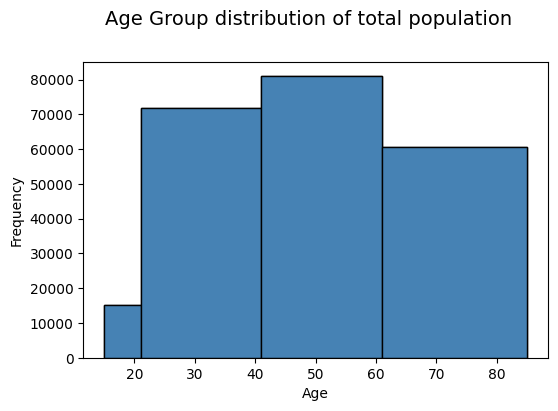

In [27]:
import matplotlib.pyplot as plt
#medium blog
#categorize as per age - derived

def ageCondition(x):
    if x >  15 and x < 20: return "Teenage"
    elif x >= 20 and x < 40: return "Young"
    elif x >= 40 and x < 60: return "Adult"
    elif x >= 60 and x < 85: return "Senior Citizen"
df['AgeGroup'] = df['TEAGE'].apply(ageCondition)

df['AgeGroup'] = pd.Categorical(df['AgeGroup'], 
                                           categories=['Teenage', 'Young', 'Adult', 'Senior Citizen'])


#print(df.head(5))
#subset_attributes = ['TESEX','GTMETSTA','TRCHILDNUM','PEHSPNON']

#doesn't make sense as most of the variables are categorical
#rs = round(df[subset_attributes].describe(),2)
#print(rs)

fig = plt.figure(figsize = (6,4))
title = fig.suptitle("Age Group distribution of total population", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Age")
ax.set_ylabel("Frequency") 
freq, bins, patches = ax.hist(df['TEAGE'], color='steelblue', bins=[15, 21, 41, 61, 85],
                                    edgecolor='black', linewidth=1)


freq, bins, patches = ax.hist(df['TEAGE'], color='steelblue', bins=[15, 21, 41, 61, 85],
                                    edgecolor='black', linewidth=1)

